In [334]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DayLocator
from matplotlib.ticker import FuncFormatter, MaxNLocator
import matplotlib.dates as mdates
import datetime as dt
import re
import seaborn as sns
from scipy.optimize import minimize
import sklearn as sklearn
from scipy.optimize import minimize
import scipy as sc
import cvxpy as cp

%matplotlib inline

In [2]:
# Load the data
set_A = pd.read_csv('data/set_A.csv')
set_B = pd.read_csv('data/set_B.csv')

C:\Users\Alon\AppData\Local\Temp\ipykernel_30408\1976112693.py:1: DtypeWarning: Columns (0,1,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  set_A = pd.read_csv('data/set_A.csv')


In [5]:
# Examine set_A
print(f'''Set A - head: \n {set_A.head()}
Set A - description: \n {set_A.describe()}
''')
# Check which columns have missing values in set_A
col_with_missing_A = set_A.columns[set_A.isna().any()].tolist()
print(f'Columns with NAs: \n {col_with_missing_A}')


Set A head: 
     iddate2       iddate3                Date    Open    High     Low   Close  \
0  1Nov2022  'AAPL'].xlsx  20221031  21:48:30  153.51  153.51  153.51  153.51   
1  1Nov2022  'AAPL'].xlsx  20221031  21:49:00  153.51  153.51  153.51  153.51   
2  1Nov2022  'AAPL'].xlsx  20221031  21:49:30  153.51  153.51  153.51  153.51   
3  1Nov2022  'AAPL'].xlsx  20221031  21:50:00  153.50  153.50  153.50  153.50   
4  1Nov2022  'AAPL'].xlsx  20221031  21:50:30  153.50  153.50  153.50  153.50   

   Volume                                nazwapl             numtime id_n2  \
0       1  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:48:30   NaN   
1       0  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:49:00   NaN   
2       0  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:49:30   NaN   
3       9  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:50:00   NaN   
4       0  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:50:30   NaN   

    id  
0  NaN  
1  NaN  
2  

In [6]:
# Examine set_B
print(f'''Set B - head: \n {set_B.head()}
Set B - description: \n {set_B.describe()}
''')
# Check which columns have missing values in set_B
col_with_missing_B = set_B.columns[set_B.isna().any()].tolist()
print(f'Columns with NAs: \n {col_with_missing_B}')

Set B - head: 
      iddate2     iddate3 id_n2           id                Date   Open   High  \
0  17Nov2022  'KW'].xlsx    kw  kw17nov2022  20221117  20:18:00  16.34  16.34   
1  17Nov2022  'KW'].xlsx    kw  kw17nov2022  20221117  20:18:30  16.34  16.34   
2  17Nov2022  'KW'].xlsx    kw  kw17nov2022  20221117  20:19:00  16.34  16.34   
3  17Nov2022  'KW'].xlsx    kw  kw17nov2022  20221117  20:19:30  16.34  16.34   
4  17Nov2022  'KW'].xlsx    kw  kw17nov2022  20221117  20:20:00  16.34  16.34   

     Low  Close  Volume                               nazwapl  \
0  16.34  16.34       0  file28800S30secs17Nov2022['KW'].xlsx   
1  16.34  16.34       0  file28800S30secs17Nov2022['KW'].xlsx   
2  16.34  16.34       0  file28800S30secs17Nov2022['KW'].xlsx   
3  16.34  16.34       0  file28800S30secs17Nov2022['KW'].xlsx   
4  16.34  16.34       0  file28800S30secs17Nov2022['KW'].xlsx   

              numtime  
0  17nov2022 20:18:00  
1  17nov2022 20:18:30  
2  17nov2022 20:19:00  
3  17nov20

* Since in set_A iddate3 contains NA rows, nazwapl will be cleaned to obtain a column of ticker names from both sets.
* The dataframe obtained from concatenating the sets will only subset the ticker names, closing price and date.

In [10]:
# Extract ticker from the 'nazwapl' column
set_A['Ticker'] = set_A['nazwapl'].str.extract("\\[\\'(.*?)\\'\\]")
set_B['Ticker'] = set_B['nazwapl'].str.extract("\\[\\'(.*?)\\'\\]")


# Display the updated sets with the new 'Ticker' column
print(set_A[['nazwapl', 'Ticker']].head())
print(set_A[['nazwapl', 'Ticker']].tail())
print(set_B[['nazwapl', 'Ticker']].head())
print(set_B[['nazwapl', 'Ticker']].tail())

                                 nazwapl Ticker
0  file28800S30secs1Nov2022['AAPL'].xlsx   AAPL
1  file28800S30secs1Nov2022['AAPL'].xlsx   AAPL
2  file28800S30secs1Nov2022['AAPL'].xlsx   AAPL
3  file28800S30secs1Nov2022['AAPL'].xlsx   AAPL
4  file28800S30secs1Nov2022['AAPL'].xlsx   AAPL
                                       nazwapl Ticker
6713971  file28800S30secs17Oct2022['ZIM'].xlsx    ZIM
6713972  file28800S30secs17Oct2022['ZIM'].xlsx    ZIM
6713973  file28800S30secs17Oct2022['ZIM'].xlsx    ZIM
6713974  file28800S30secs17Oct2022['ZIM'].xlsx    ZIM
6713975  file28800S30secs17Oct2022['ZIM'].xlsx    ZIM
                                nazwapl Ticker
0  file28800S30secs17Nov2022['KW'].xlsx     KW
1  file28800S30secs17Nov2022['KW'].xlsx     KW
2  file28800S30secs17Nov2022['KW'].xlsx     KW
3  file28800S30secs17Nov2022['KW'].xlsx     KW
4  file28800S30secs17Nov2022['KW'].xlsx     KW
                                        nazwapl Ticker
5560918  file28800S30secs31Oct2022['ZYXI'].xlsx   Z

In [11]:
# Convert the Date column to a date format
set_A['Date'] = pd.to_datetime(set_A['Date'])
set_B['Date'] = pd.to_datetime(set_B['Date'])


# Display the updated sets with the 'Date' column in datetime format
print(set_A.head())
print(set_B.head())

    iddate2       iddate3                Date    Open    High     Low   Close  \
0  1Nov2022  'AAPL'].xlsx 2022-10-31 21:48:30  153.51  153.51  153.51  153.51   
1  1Nov2022  'AAPL'].xlsx 2022-10-31 21:49:00  153.51  153.51  153.51  153.51   
2  1Nov2022  'AAPL'].xlsx 2022-10-31 21:49:30  153.51  153.51  153.51  153.51   
3  1Nov2022  'AAPL'].xlsx 2022-10-31 21:50:00  153.50  153.50  153.50  153.50   
4  1Nov2022  'AAPL'].xlsx 2022-10-31 21:50:30  153.50  153.50  153.50  153.50   

   Volume                                nazwapl             numtime id_n2  \
0       1  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:48:30   NaN   
1       0  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:49:00   NaN   
2       0  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:49:30   NaN   
3       9  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:50:00   NaN   
4       0  file28800S30secs1Nov2022['AAPL'].xlsx  31oct2022 21:50:30   NaN   

    id Ticker  
0  NaN   AAPL  
1  NaN   AAP

In [12]:
# Build a concatenated dataset out of both sets
# Subset the data to include only relevant columns
subset_A = set_A[['Date', 'Close', 'Ticker']]
subset_B = set_B[['Date', 'Close', 'Ticker']]

In [13]:
# Assuming subset_A and subset_B are DataFrames
combined_data = pd.concat([subset_A, subset_B], ignore_index=True)

In [20]:
# Check for duplicates in combined_data
duplicates = combined_data[combined_data.duplicated(subset=['Ticker', 'Date'])]

# Display the duplicate rows
print(duplicates)

# Count the number of duplicate rows
num_duplicates = len(duplicates)
print("Number of duplicate rows:", num_duplicates)

                        Date   Close Ticker
961      2022-11-01 13:48:30  155.55   AAPL
1874     2022-11-01 15:11:00  150.72   AAPL
2527     2022-11-01 13:49:30  379.50   ABMD
3441     2022-11-01 15:12:30  378.48   ABMD
6036     2022-11-01 13:44:00   22.59    AGQ
...                      ...     ...    ...
12272986 2022-10-28 22:11:00   41.47   YUMC
12272987 2022-10-28 22:11:30   41.47   YUMC
12272988 2022-10-28 22:12:00   41.47   YUMC
12272989 2022-10-28 22:12:30   41.47   YUMC
12272990 2022-10-28 22:13:00   41.47   YUMC

[1277364 rows x 3 columns]
Number of duplicate rows: 1277364


In [37]:
# Deduplicate based on 'Date' within each group of 'Ticker'
deduplicated_data = combined_data.groupby('Ticker').apply(lambda group: group.drop_duplicates('Date', keep='first')).reset_index(drop=True)

# Display the first few rows of the deduplicated dataset
print(deduplicated_data.head())

                 Date   Close Ticker
0 2022-11-03 14:32:00  132.65      A
1 2022-11-03 14:32:30  132.65      A
2 2022-11-03 14:33:00  132.65      A
3 2022-11-03 14:33:30  132.65      A
4 2022-11-03 14:34:00  132.65      A


In [38]:
# Create a subset of deduplicated_data with the 500 top tickers by # of observations
ticker_counts = deduplicated_data['Ticker'].value_counts()
top_500_tickers = ticker_counts.head(500).index

combined_data_500 = deduplicated_data[deduplicated_data['Ticker'].isin(top_500_tickers)].copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


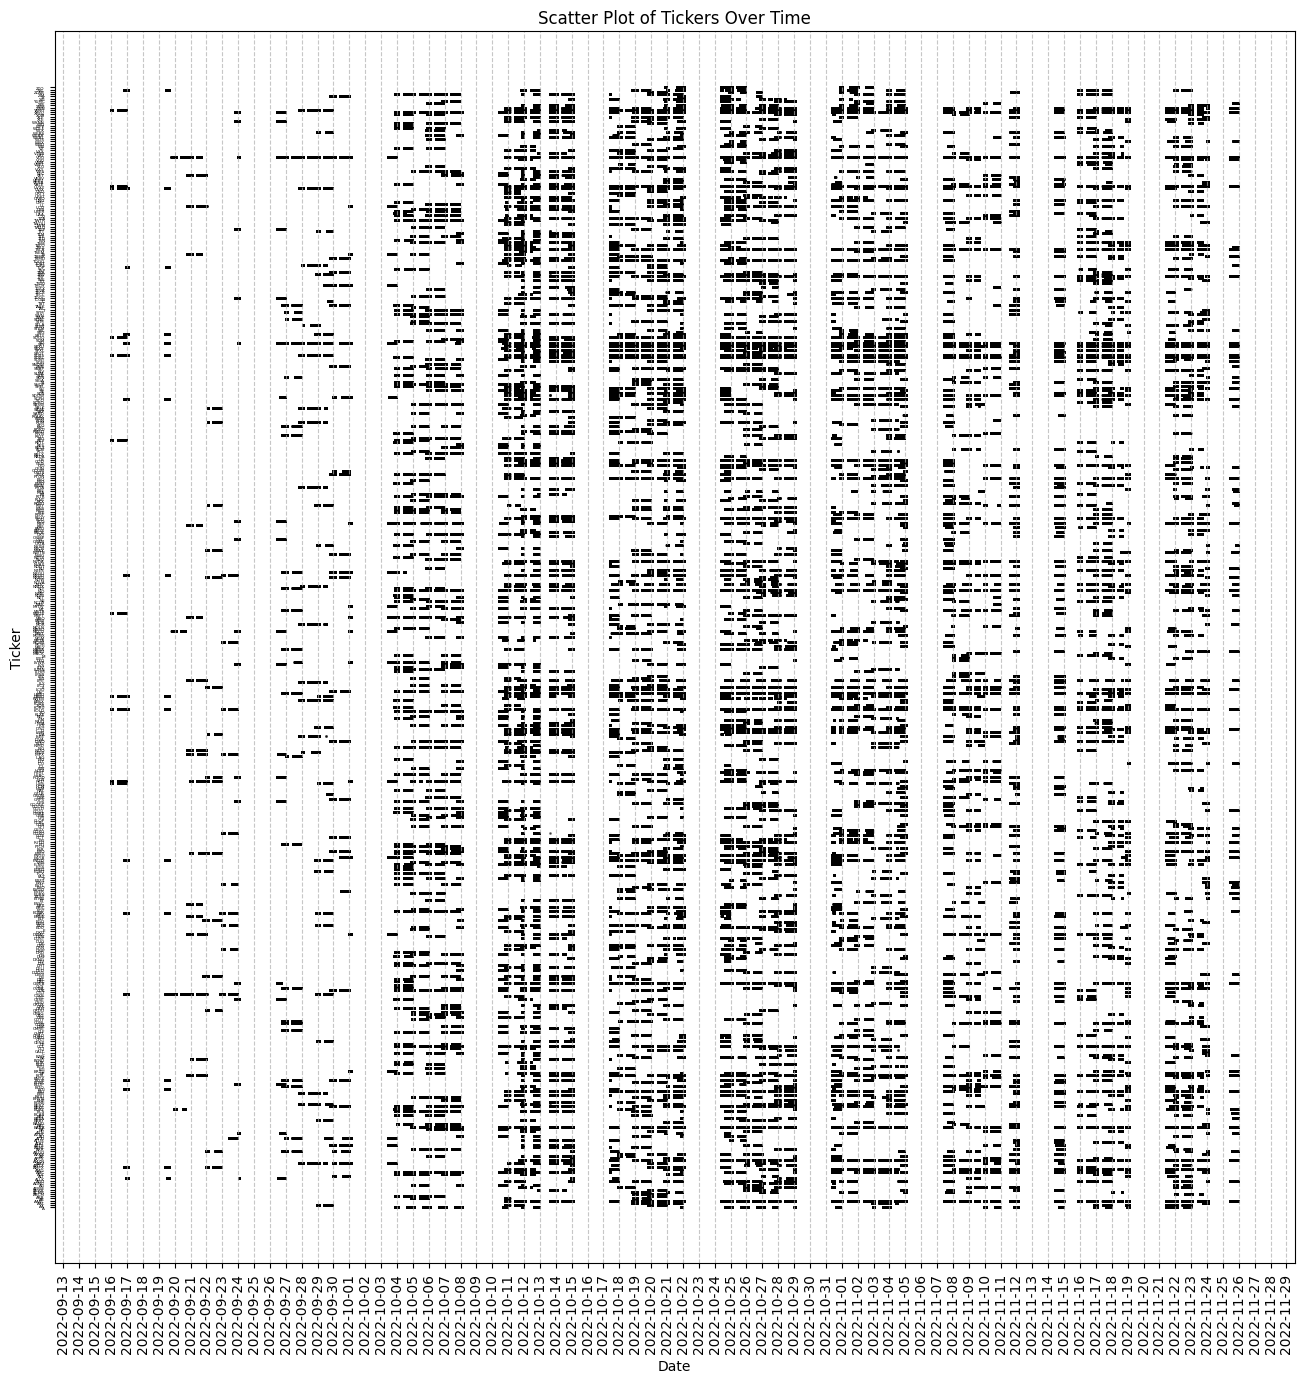

In [47]:
# Visualize the data in a scatter plot to see the time span for most of the observations in the data
# Create a separate dataframe plot_df_500 based on combined_data_500
plot_df_500 = combined_data_500.copy()

# Calculate the number of observations for each ticker and assign it to a new column 'n'
plot_df_500['n'] = plot_df_500.groupby('Ticker')['Ticker'].transform('count')

# Create the scatter plot with x-axis as Date and y-axis as Ticker
plt.figure(figsize=(16, 16))
plt.scatter(plot_df_500['Date'], plot_df_500['Ticker'], s=1, color='black', alpha=0.5)

# Customize the plot
plt.title("Scatter Plot of Tickers Over Time")
plt.xlabel("Date")
plt.ylabel("Ticker")
plt.xticks(rotation=90)
plt.yticks(fontsize=3)

# Set daily x-axis ticks
plt.gca().xaxis.set_major_locator(DayLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

# Customize the grid to align with x-axis ticks
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Remove the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

A conservative visual assesment would be that the majority of the information is located between Monday 10-10-2022 and Friday 19-11-2022 (only weekdays where trade normally takes place were selected, but the data appears to include after-hours trading until 2am the following day for each trading day).

In [58]:
# Set the date window
start_date = '2022-10-10'
end_date = '2022-11-19'

# Filter data within the specified date range
data_500_window = combined_data_500[(combined_data_500['Date'] >= start_date) & (combined_data_500['Date'] <= end_date)]

# Organise by Date
data_500_window = data_500_window.sort_values(by=['Ticker', 'Date'])

# Display the first few rows of the filtered dataset
print(data_500_window.head())

                    Date   Close Ticker
8310 2022-10-10 15:30:00  127.75      A
8311 2022-10-10 15:30:30  127.75      A
8312 2022-10-10 15:31:00  127.54      A
8313 2022-10-10 15:31:30  127.62      A
8314 2022-10-10 15:32:00  127.50      A


In [59]:
# Pivot the data setting missing observations to NA for each Ticker
pivoted_df1 = data_500_window.pivot_table(index='Date', columns='Ticker', values='Close', aggfunc='first')

print(pivoted_df1.head())

Ticker                A  AA  AAL  AAPL  AB  ABB  ABCM  ACMR  AEHR  AFRM  ...  \
Date                                                                     ...   
2022-10-10 10:00:00 NaN NaN  NaN   NaN NaN  NaN   NaN   NaN   NaN   NaN  ...   
2022-10-10 10:00:30 NaN NaN  NaN   NaN NaN  NaN   NaN   NaN   NaN   NaN  ...   
2022-10-10 10:01:00 NaN NaN  NaN   NaN NaN  NaN   NaN   NaN   NaN   NaN  ...   
2022-10-10 10:01:30 NaN NaN  NaN   NaN NaN  NaN   NaN   NaN   NaN   NaN  ...   
2022-10-10 10:02:00 NaN NaN  NaN   NaN NaN  NaN   NaN   NaN   NaN   NaN  ...   

Ticker               YINN  YMM  YPF  YUMC  YXI  YY  ZIM  ZLAB  ZSL  ZTO  
Date                                                                     
2022-10-10 10:00:00   NaN  NaN  NaN   NaN  NaN NaN  NaN   NaN  NaN  NaN  
2022-10-10 10:00:30   NaN  NaN  NaN   NaN  NaN NaN  NaN   NaN  NaN  NaN  
2022-10-10 10:01:00   NaN  NaN  NaN   NaN  NaN NaN  NaN   NaN  NaN  NaN  
2022-10-10 10:01:30   NaN  NaN  NaN   NaN  NaN NaN  NaN   NaN  NaN  N

In [60]:
# Subset the pivoted data resampling it to 3 intervals - minute, half hour and hour
df_minute = pivoted_df1.resample('1T').last()
df_Hhour = pivoted_df1.resample('30T').last()
df_hourly = pivoted_df1.resample('H').last()

In [78]:
# # Find the most negatively correlated pairs of stocks in df_hourly
# cor_matrix = df_hourly.corr()

# # Create a vector of correlation values excluding diagonal
# cor_values = cor_matrix.where(np.tril(np.ones(cor_matrix.shape), k=-1).astype(bool)).stack()

# # Order by most negatively correlated pairs
# top_neg_cor_indices = cor_values.sort_values(ascending=True, na_position='last').index

# # Extract the corresponding ticker pairs
# top_neg_cor_pairs = pd.DataFrame({
#     'row': [index[0] for index in top_neg_cor_indices],
#     'col': [index[1] for index in top_neg_cor_indices],
#     'cor_value': cor_values[top_neg_cor_indices].values
# })

# # Display the correlated pairs under -0.7
# print(top_neg_cor_pairs[top_neg_cor_pairs['cor_value'] < -0.9])
# # Create a list of tickers based on the correlation matrix to subset the dataframe
# tickers_by_corr = np.unique(top_neg_cor_pairs[['row', 'col']].values)
# df_hourly_corr = df_hourly[tickers_by_corr]
# print(df_hourly_corr.head())

       row   col  cor_value
0     MSTR  ETNB  -1.000000
1      XLF  GOOG  -1.000000
2     LYFT  GOOG  -1.000000
3      STM   OXY  -1.000000
4     TARK   OXY  -1.000000
...    ...   ...        ...
7114  NCLH  LTHM  -0.900086
7115  TSLA  MNSO  -0.900036
7116  SPOT  MCHI  -0.900024
7117  TSEM   ING  -0.900008
7118   PBR  ARKK  -0.900002

[7119 rows x 3 columns]


In [62]:
# Subset the dataframe to the best tickers by # of observations
column_counts = df_minute.count()
sorted_columns = column_counts.sort_values(ascending=False)
top_100_columns = sorted_columns.head(100)
df_minute_top_100 = df_minute.loc[:, top_100_columns.index]
df_Hhour_top_100 = df_Hhour.loc[:, top_100_columns.index]
df_hour_top_100 = df_hourly.loc[:, top_100_columns.index]

In [80]:
# Define trading hours
start_day_hour = '10:00:00'
end_day_hour = '00:00:00'

# Filter DataFrame to keep observations within trading hours
df_trading_hours_minute = df_minute_top_100.between_time(start_day_hour, end_day_hour)
df_trading_hours_Hhour = df_Hhour_top_100.between_time(start_day_hour, end_day_hour)
df_trading_hours_hour = df_hour_top_100.between_time(start_day_hour, end_day_hour)

In [81]:
# Clean entire rows with NA
df_trading_hours_minute_cleaned = df_trading_hours_minute.dropna(how='all')
df_trading_hours_Hhour_cleaned = df_trading_hours_Hhour.dropna(how='all')
df_trading_hours_hour_cleaned = df_trading_hours_hour.dropna(how='all')

# Check for NA values left
print("Any NA values in df_trading_hours_minute_cleaned:", df_trading_hours_minute_cleaned.isna().any().any())
print("Any NA values in df_trading_hours_Hhour_cleaned:", df_trading_hours_Hhour_cleaned.isna().any().any())
print("Any NA values in df_trading_hours_hour_cleaned:", df_trading_hours_hour_cleaned.isna().any().any())



Any NA values in df_trading_hours_minute_cleaned: True
Any NA values in df_trading_hours_Hhour_cleaned: True
Any NA values in df_trading_hours_hour_cleaned: True


In [86]:
# Define the linear interpolation function
def linear_interpolation(series):
    na_index = np.where(series.isna())[0]

    for i in na_index:
        before_candidates = np.where(~series.isna())[0]
        before_candidates = before_candidates[before_candidates < i]
        
        after_candidates = np.where(~series.isna())[0]
        after_candidates = after_candidates[after_candidates > i]

        if len(before_candidates) > 0 and len(after_candidates) > 0:
            before = max(before_candidates)
            after = min(after_candidates)

            series.iat[i] = series.iat[before] + ((series.iat[after] - series.iat[before]) / (after - before)) * (i - before)

    return series

# Apply linear interpolation to df_trading_hours_minute_cleaned
final_minute = df_trading_hours_minute_cleaned.apply(linear_interpolation, axis=0)

# Apply linear interpolation to df_trading_hours_Hhour_cleaned
final_Hhour = df_trading_hours_Hhour_cleaned.apply(linear_interpolation, axis=0)

# Apply linear interpolation to df_trading_hours_hour_cleaned
final_hour = df_trading_hours_hour_cleaned.apply(linear_interpolation, axis=0)

In [95]:
# Drop columns with a large number of preceeding or trailing NAs
# Define a function to drop columns with more than a quarter of NaN values
def drop_columns_with_nan(df, threshold=0.05):
    threshold_count = int(len(df) * threshold)
    nan_counts = df.isnull().sum()
    dropped_columns = df.columns[nan_counts > threshold_count]
    
    if len(dropped_columns) > 0:
        print(f"Dropping columns: {dropped_columns}")
    
    cleaned_df = df.loc[:, ~df.columns.isin(dropped_columns)]
    
    if len(dropped_columns) > 0:
        print(f"Columns after dropping: {cleaned_df.columns}")
    
    return cleaned_df

# Apply the function to your DataFrames
final_minute_cleaned = drop_columns_with_nan(final_minute)
final_Hhour_cleaned = drop_columns_with_nan(final_Hhour)
final_hour_cleaned = drop_columns_with_nan(final_hour)

Dropping columns: Index(['AMZN', 'BOIL', 'LI', 'TQQQ', 'SQQQ', 'QQQ', 'FNGD', 'UNG', 'AGQ',
       'UCO', 'NTES', 'KORU', 'HKD', 'DRV', 'BERZ', 'TLT', 'WEBS', 'JDST',
       'FXI', 'EDZ', 'GDS', 'VIPS', 'SOFI', 'GOOGL', 'BLUE', 'BITO', 'XLF',
       'SNAP', 'FREY', 'EPV', 'BZ', 'SRTY', 'DWAC', 'WEBL', 'COIN', 'INDO',
       'TECS', 'CUK', 'MSFT', 'MARA', 'ZSL', 'DUST', 'ZIM', 'EMBK'],
      dtype='object', name='Ticker')
Columns after dropping: Index(['SPY', 'SOXL', 'SPXU', 'LABU', 'XPEV', 'SOXS', 'VOO', 'UVXY', 'NIO',
       'AAPL', 'TSLA', 'BABA', 'KOLD', 'BILI', 'TMF', 'YANG', 'QID', 'CWEB',
       'CCL', 'PDD', 'PSQ', 'NVDA', 'IWM', 'SPXL', 'YINN', 'LMT', 'NOC',
       'SDOW', 'NRGD', 'BEKE', 'JD', 'TZA', 'AMC', 'TCOM', 'AMD', 'SCO', 'SH',
       'FUTU', 'UVIX', 'LABD', 'FNGU', 'EDU', 'SDS', 'BIDU', 'PBR', 'SLV',
       'LCID', 'TSM', 'SE', 'CVNA', 'DRIP', 'NVAX', 'SBSW', 'IONQ', 'GFI',
       'TSLQ'],
      dtype='object', name='Ticker')
Dropping columns: Index(['AMZN', 'BOIL', 'L

In [96]:
# Drop all rows with NaN values
minute = final_minute_cleaned.dropna()
half_hour = final_Hhour_cleaned.dropna()
hour = final_hour_cleaned.dropna()

In [97]:
# Calculate returns for each dataframe
returns_minute = minute.pct_change().dropna()
returns_half_hour = half_hour.pct_change().dropna()
returns_hour = hour.pct_change().dropna()

print(returns_hour.head())

Ticker                    SPY      SOXL      SPXU      LABU      XPEV  \
Date                                                                    
2022-10-11 17:00:00  0.009091  0.047361 -0.025827  0.059908  0.055675   
2022-10-11 18:00:00  0.003853  0.009044 -0.012093  0.008696 -0.033469   
2022-10-11 19:00:00 -0.000718 -0.007682  0.001883 -0.014368 -0.003148   
2022-10-11 20:00:00 -0.012628 -0.050323  0.038534 -0.080175 -0.015789   
2022-10-11 21:00:00  0.001175  0.023098 -0.003620  0.049128  0.004278   

Ticker                   SOXS       VOO      UVXY       NIO      AAPL  ...  \
Date                                                                   ...   
2022-10-11 17:00:00 -0.039974  0.008949 -0.027149  0.029549  0.009492  ...   
2022-10-11 18:00:00 -0.007188  0.003801  0.001550 -0.009819  0.002849  ...   
2022-10-11 19:00:00  0.005191 -0.000541  0.010836 -0.016781 -0.002415  ...   
2022-10-11 20:00:00  0.046888 -0.012690  0.033691 -0.015516 -0.012746  ...   
2022-10-11 21:00:00 

In [99]:
# Create portfolios of equal weights for each dataframe
ew_port_minute = returns_minute.mean(axis=1)
ew_port_half_hour = returns_half_hour.mean(axis=1)
ew_port_hour = returns_hour.mean(axis=1)

print(ew_port_hour.head())

Date
2022-10-11 17:00:00    0.007445
2022-10-11 18:00:00   -0.002155
2022-10-11 19:00:00   -0.003605
2022-10-11 20:00:00   -0.002999
2022-10-11 21:00:00    0.002196
dtype: float64


### Analysing final_hour

In [153]:
# Calculate the cumulative return for ew_port_hour
cumulative_ew_port_hour = (1 + ew_port_hour).cumprod() - 1

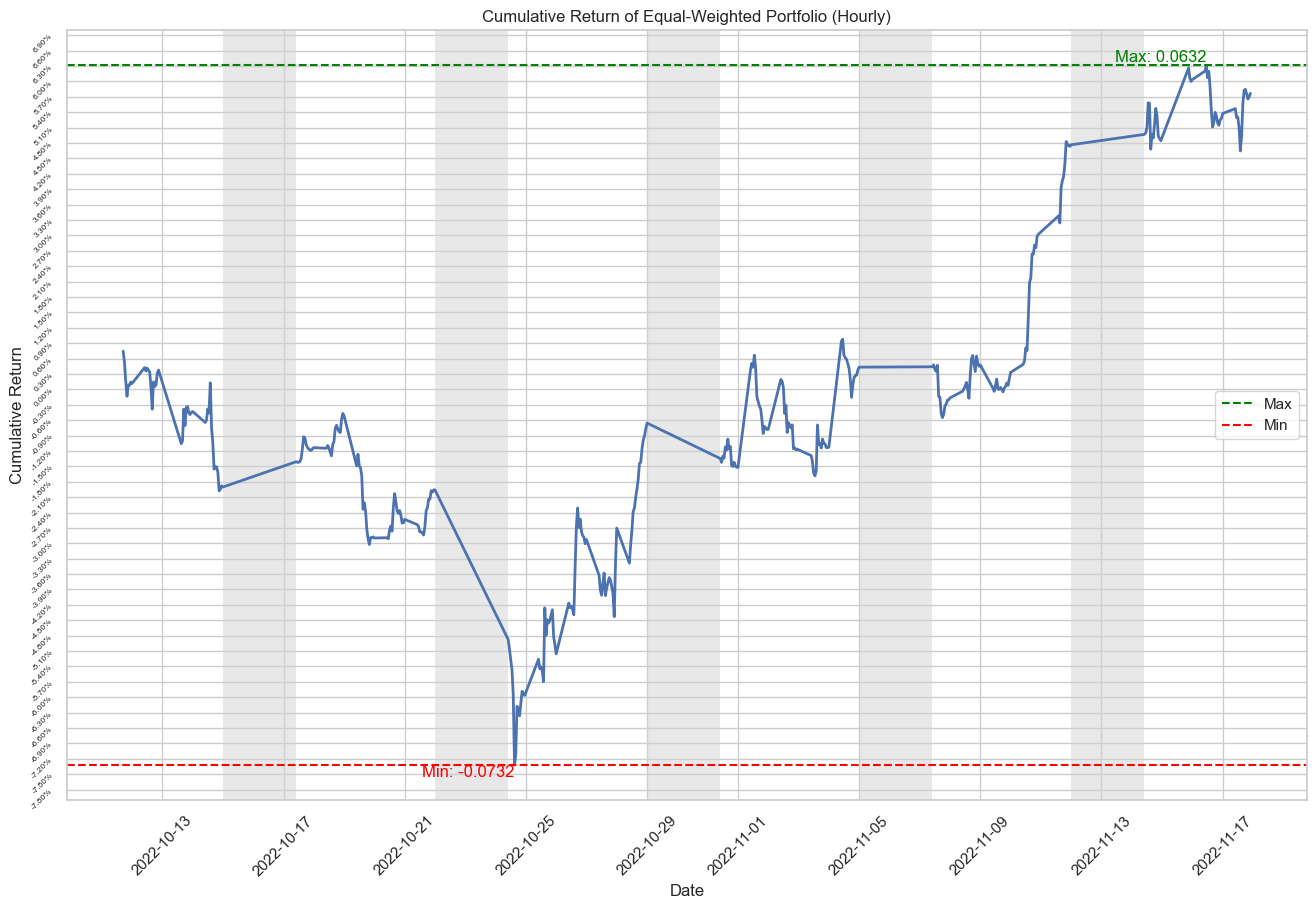

In [171]:
# Plot the time series of cumulative returns for the equally weighted portfolio of hourly transactions
# Set the style for the plot
sns.set(style="whitegrid")

# Function to format y-axis ticks as percentages
def percentage_formatter(x, pos):
    return f'{100 * x:.2f}%'

# Create a line plot for the cumulative return
plt.figure(figsize=(16, 10))
sns.lineplot(data=cumulative_ew_port_hour, linewidth=2)
plt.title('Cumulative Return of Equal-Weighted Portfolio (Hourly)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

# Rotate xticks for better visibility
plt.xticks(rotation=45)

# Identify the index of the global minimum and maximum
min_index = cumulative_ew_port_hour.idxmin()
max_index = cumulative_ew_port_hour.idxmax()

# Add another line at the global maximum
plt.axhline(y=cumulative_ew_port_hour.loc[max_index], color='green', linestyle='--', label='Max')

# Add a red horizontal line at the global minimum
plt.axhline(y=cumulative_ew_port_hour.loc[min_index], color='red', linestyle='--', label='Min')

# Add text annotations for the maximum and minimum points
plt.text(min_index, cumulative_ew_port_hour.loc[min_index], f'Min: {cumulative_ew_port_hour.loc[min_index]:.4f}', color='red', ha='right', va='top')
plt.text(max_index, cumulative_ew_port_hour.loc[max_index], f'Max: {cumulative_ew_port_hour.loc[max_index]:.4f}',color='green', ha='right', va='bottom')

# Format y-axis ticks as percentages
plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Set the number of y-axis ticks
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=60))

# Adjust y-axis tick parameters
plt.yticks(fontsize=6, rotation=45)

# Shade weekends
dates = cumulative_ew_port_hour.index
weekend_mask = (dates.weekday >= 5)  # Assuming Saturday and Sunday are weekends

for i in range(len(dates) - 1):
    if weekend_mask[i] and not weekend_mask[i + 1]:
        plt.axvspan(dates[i], dates[i + 1], facecolor='lightgray', edgecolor='none', alpha=0.5)

plt.legend()
plt.show()

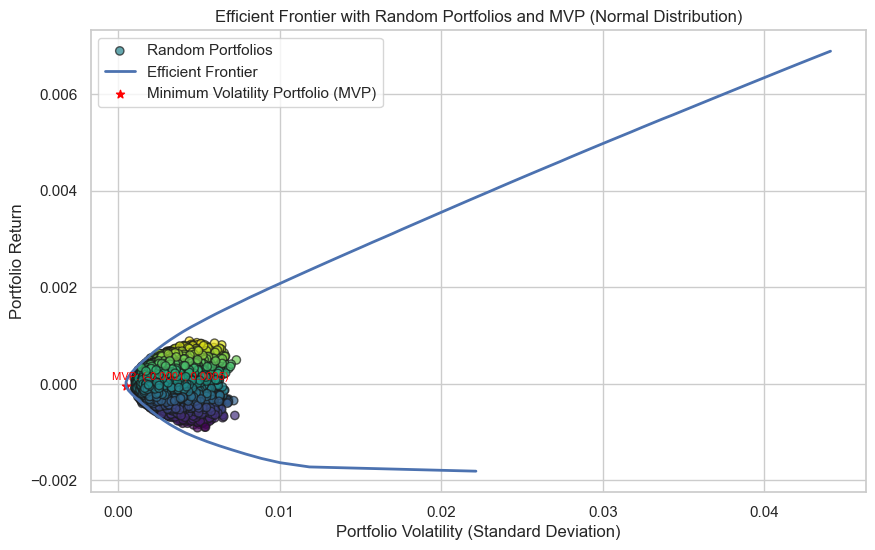

In [431]:
# Function to calculate portfolio return
def portfolio_return(weights, returns):
    return np.dot(weights, np.mean(returns, axis=0))

# Function to calculate portfolio volatility
def portfolio_volatility(weights, returns):
    return np.sqrt(np.dot(weights.T, np.dot(np.cov(returns.T), weights)))

# Function for the optimization (minimize volatility)
def minimize_volatility(weights, returns):
    return portfolio_volatility(weights, returns)

returns = returns_hour
tickers = returns_hour.columns

# Number of assets
num_assets = len(returns_hour.columns)  # Use length of columns in returns_hour dataframe

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for asset in range(num_assets))

# Portfolio optimization for efficient frontier
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

for return_target in np.linspace(returns.mean().min(), returns.mean().max(), 100):
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, returns) - return_target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    result = minimize(minimize_volatility, num_assets * [1./num_assets,], args=(returns,),
                      method='SLSQP', bounds=bounds, constraints=constraints)
    portfolio_returns.append(return_target)
    portfolio_volatilities.append(portfolio_volatility(result.x, returns))
    portfolio_weights.append(result.x)

# Find the Minimum Volatility Portfolio (MVP)
mvp_index = np.argmin(portfolio_volatilities)
mvp_return = portfolio_returns[mvp_index]
mvp_volatility = portfolio_volatilities[mvp_index]
mvp_weights = portfolio_weights[mvp_index]

# Simulate 1,000,000 random portfolios with a normal distribution
num_portfolios = 1000000
random_portfolios = []

for _ in range(num_portfolios):
    weights = np.random.normal(0, 1, size=num_assets)  # Use normal distribution with larger std deviation
    weights /= np.sum(np.abs(weights))  # Ensure weights sum to 1
    return_portfolio = portfolio_return(weights, returns)
    volatility_portfolio = portfolio_volatility(weights, returns)
    random_portfolios.append((return_portfolio, volatility_portfolio, weights))

# Extract returns and volatilities for plotting
random_portfolio_returns, random_portfolio_volatilities, random_portfolio_weights = zip(*random_portfolios)

In [439]:
returns = returns_hour
# Function to find portfolio weights for a given volatility level
def find_portfolio_weights(volatility_level):
    closest_volatility_idx = np.argmin(np.abs(np.array(portfolio_volatilities) - volatility_level))

    return portfolio_weights[closest_volatility_idx-1]

# User input for a standard deviation level
desired_volatility = round(ew_port_hour.std(), 3)
weights = find_portfolio_weights(desired_volatility)
return_per_risk = portfolio_return(find_portfolio_weights(desired_volatility), returns)
print(f"Return for risk: {return_per_risk:.4f}")
print("Portfolio weights for the desired volatility level:")
for ticker, weight in zip(tickers, weights):
    print(f"{ticker}: {weight:.2f}")

Return for risk: 0.0010
Portfolio weights for the desired volatility level:
SPY: 0.00
SOXL: 0.00
SPXU: 0.00
LABU: 0.00
XPEV: 0.00
SOXS: 0.00
VOO: 0.00
UVXY: 0.00
NIO: 0.00
AAPL: 0.00
TSLA: 0.00
BABA: 0.00
KOLD: 0.00
AMZN: 0.00
BILI: 0.00
TMF: 0.00
YANG: 0.05
QID: 0.00
CWEB: 0.00
CCL: 0.03
PDD: 0.00
PSQ: 0.00
NVDA: 0.00
IWM: 0.00
SPXL: 0.00
YINN: 0.00
LMT: 0.04
NOC: 0.00
SDOW: 0.00
NRGD: 0.00
BEKE: 0.00
JD: 0.00
TZA: 0.00
AMC: 0.00
TCOM: 0.00
AMD: 0.04
SCO: 0.04
SH: 0.00
FUTU: 0.19
UVIX: 0.00
LABD: 0.00
FNGU: 0.06
EDU: 0.00
SDS: 0.00
BIDU: 0.00
PBR: 0.00
SLV: 0.00
LCID: 0.00
TSM: 0.26
SE: 0.00
CVNA: 0.00
DRIP: 0.00
NVAX: 0.00
SBSW: 0.00
IONQ: 0.00
GFI: 0.08
TSLQ: 0.21


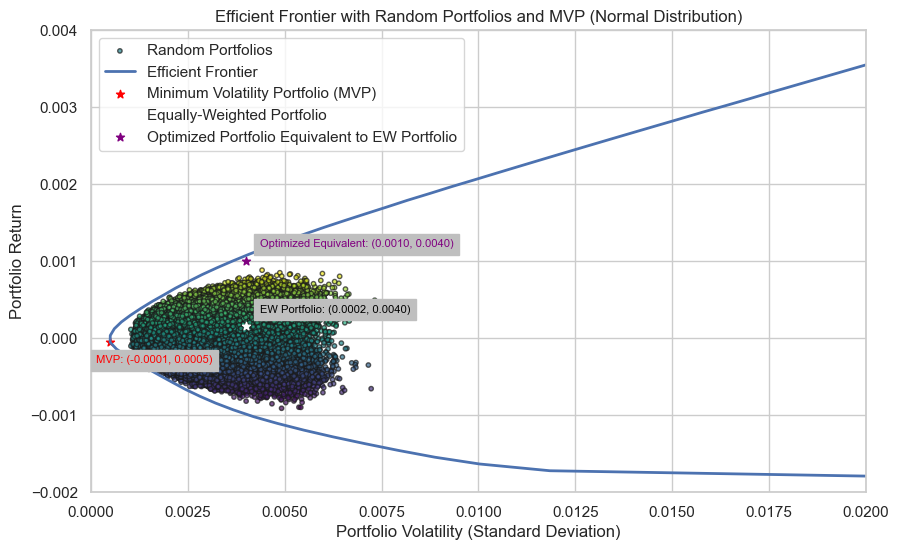

In [452]:
# Plotting the efficient frontier and random portfolios
plt.figure(figsize=(10, 6))
plt.scatter(random_portfolio_volatilities, random_portfolio_returns, c=random_portfolio_returns,
            cmap='viridis', marker='o', alpha=0.7, label='Random Portfolios', edgecolors='k', s=10)
plt.plot(portfolio_volatilities, portfolio_returns, 'b-', linewidth=2, label='Efficient Frontier')
plt.scatter(mvp_volatility, mvp_return, marker='*', color='red', label='Minimum Volatility Portfolio (MVP)')
plt.scatter(desired_volatility, ew_port_hour.mean(), marker='*', color='w', label='Equally-Weighted Portfolio')
plt.scatter(desired_volatility, return_per_risk, marker='*', color='purple', label='Optimized Portfolio Equivalent to EW Portfolio')

# Display the tuple of (volatility, return) for the MVP
plt.annotate(f'MVP: ({mvp_return:.4f}, {mvp_volatility:.4f})', (mvp_volatility, mvp_return),
             textcoords="offset points", xytext=(-10,-15), ha='left', fontsize=8, color='red', backgroundcolor="0.75")

# Display the tuple of (volatility, return) for the equally-weighted portfolio
plt.annotate(f'EW Portfolio: ({ew_port_hour.mean():.4f}, {desired_volatility:.4f})', (desired_volatility, ew_port_hour.mean()),
             textcoords="offset points", xytext=(10,10), ha='left', fontsize=8, color='black', backgroundcolor="0.75")

# Display the tuple of (volatility, return) for the optimized portfolio with risk equal to ew portfolio
plt.annotate(f'Optimized Equivalent: ({return_per_risk:.4f}, {desired_volatility:.4f})', (desired_volatility, return_per_risk),
             textcoords="offset points", xytext=(10,10), ha='left', fontsize=8, color='purple', backgroundcolor="0.75")

plt.title('Efficient Frontier with Random Portfolios and MVP (Normal Distribution)')
plt.xlabel('Portfolio Volatility (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.legend()

# Set axis limits
plt.ylim(-0.002, 0.004)
plt.xlim(0.00, 0.02)

plt.show()

In [430]:
covariance_matrix = returns_hour.cov()
expected_returns = returns_hour.mean()
# Number of assets
n_assets = len(expected_returns)

# Define the optimization variables
weights = cp.Variable(n_assets)
target_return = cp.Parameter()

# Define constraints
constraints = [
    cp.sum(weights) == 1,
    weights >= 0
]

# Define the portfolio risk
portfolio_risk = cp.quad_form(weights @ covariance_matrix.values, np.eye(n_assets))

# Define the objective (minimize portfolio risk)
objective = cp.Minimize(portfolio_risk)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Print the weights
print("Optimal Weights:")
for i, weight in enumerate(optimal_weights):
    print(f"Stock {i+1}: {weight}")

Optimal Weights:
Stock 1: 0.017551654222116422
Stock 2: 0.017216294071992863
Stock 3: 0.017860089116129123
Stock 4: 0.01727987393370929
Stock 5: 0.017193077532661305
Stock 6: 0.01802794742935359
Stock 7: 0.01755532289749226
Stock 8: 0.01777881261459277
Stock 9: 0.01726671963915454
Stock 10: 0.017529072621046565
Stock 11: 0.01745771427287618
Stock 12: 0.017325753041768387
Stock 13: 0.017681426084960157
Stock 14: 0.017479056941814775
Stock 15: 0.017183650682568122
Stock 16: 0.017519814334841902
Stock 17: 0.018191738610253576
Stock 18: 0.0178038820891113
Stock 19: 0.017073558913909118
Stock 20: 0.017491548593832094
Stock 21: 0.01728951863142665
Stock 22: 0.017718501091658928
Stock 23: 0.01748331696199288
Stock 24: 0.017554445517463678
Stock 25: 0.017457517386536517
Stock 26: 0.01710460538811182
Stock 27: 0.017618249094846973
Stock 28: 0.017617170708258287
Stock 29: 0.01776013728532965
Stock 30: 0.01779546975302472
Stock 31: 0.017330481943206043
Stock 32: 0.017336156005241153
Stock 33: 0.0

In [429]:
portfolio_risk.value

5.553309589079612e-08